# Diet, medical history, hydration and stress levels with the general diabetes occurence in the dataset

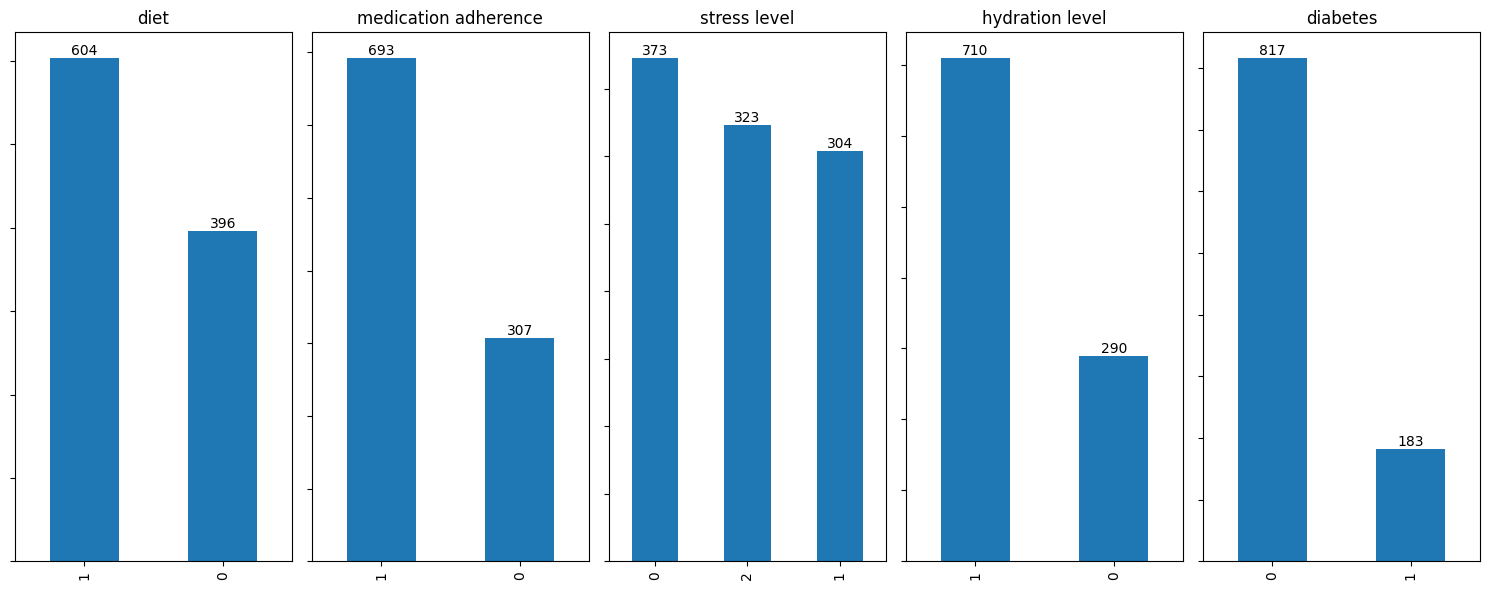

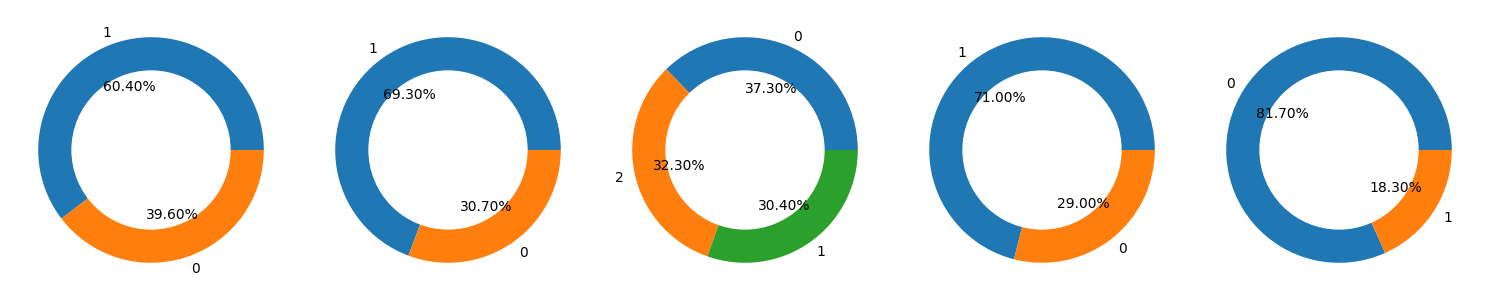

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error

def bar_labels(axes, rotation=0, location="edge"):
    for container in axes.containers:
        axes.bar_label(container, rotation=rotation, label_type=location)
    axes.set_ylabel("")
    axes.set_xlabel("")
    axes.set_yticklabels(())

rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
svc = SVC()
lgr = LogisticRegression()
xgbc = XGBClassifier()
lgbc = LGBMClassifier()

models_cl = [rfc, abc, gbc, etc,
         lgr, svc, xgbc, lgbc]

names_cl = ["Random Forest", "Ada Boost", "Gradient Boosting", "Extra Trees",
        "Logistic Regression", "Support Vector Machine", "XGBoost", "LightGBM"]

def training_classification():
    scores, reports, cms = [], dict(), dict()

    for i, j in zip(models_cl, names_cl):
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        scores += [accuracy_score(pred, y_test)*100]
        reports[j] = classification_report(pred, y_test)
        cms[j] = confusion_matrix(pred, y_test)
    fig, axes = plt.subplots()
    dd = pd.DataFrame({"score": scores}, index=names_cl)
    dd = dd.sort_values("score", ascending=False)
    dd["score"] = round(dd["score"], 2)
    dd["score"].plot(kind="bar", ax=axes)
    bar_labels(axes)
    plt.tight_layout()
    plt.show()

    index = 0

    for _ in range(2):
        fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
        for i in range(4):
            sns.heatmap(cms[dd.index[index]], annot=True, fmt='d', ax=axes[i])
            axes[i].set_title("{}: {}%".format(dd.index[index], dd.iloc[index, 0]))
            index += 1
        plt.tight_layout()
        plt.show()

    for i in dd.index:
        print("*"*30)
        print(i)
        print(reports[i])

        print("\n\n")

rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
etr = ExtraTreesRegressor()
svr = SVR()
lnr = LinearRegression()
xgbr = XGBRegressor()
lgbr = LGBMRegressor()

models_r = [rfr, abr, gbr, etr,
         lnr, svr, xgbr, lgbr]

names_r = ["Random Forest", "Ada Boost", "Gradient Boosting", "Extra Trees",
        "Linear Regression", "Support Vector Machine", "XGBoost", "LightGBM"]

def training_regression():
    r2s, mses = [], []

    for i in models_r:
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        r2s += [r2_score(pred, y_test)*100]
        mses += [mean_squared_error(pred, y_test)]

    dd = pd.DataFrame({"r2": r2s, "mse": mses}, index=names_r)
    fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
    index = 0
    dd = dd.sort_values("r2", ascending=False)
    dd["r2"] = round(dd["r2"], 2)
    dd["r2"].plot(kind="bar", ax=axes[index])
    bar_labels(axes[index])
    axes[index].set_title("r2 scores")

    index += 1

    dd = dd.sort_values("mse", ascending=True)
    dd["mse"] = round(dd["mse"], 4)
    dd["mse"].plot(kind="bar", ax=axes[index])
    bar_labels(axes[index])
    axes[index].set_title("mse scores")

    plt.tight_layout()
    plt.show()

df = pd.read_csv("../data/diabetes_data.csv")

df.drop(["user_id", "date"], axis=1, inplace=True)

df["risk_score"] /= 100

df["diabetes"] = df["risk_score"].apply(lambda x: 1 if x > 0.5 else 0)

cats = [i for i in df.columns if  df[i].nunique() <=3 ]

fig, axes = plt.subplots(ncols=5, figsize=(15, 6))

for i, j in enumerate(cats):
    df[j].value_counts().plot(kind="bar", ax=axes[i])
    bar_labels(axes[i])
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols=5, figsize=(15, 6))

for i, j in enumerate(cats):
    df[j].value_counts().plot(kind="pie", autopct="%0.2f%%", ax=axes[i])
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    axes[i].add_artist(my_circle)
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
plt.tight_layout()
plt.show()

# Diet, medical history, stress and hydration levels vs diabetes occurence tendencies

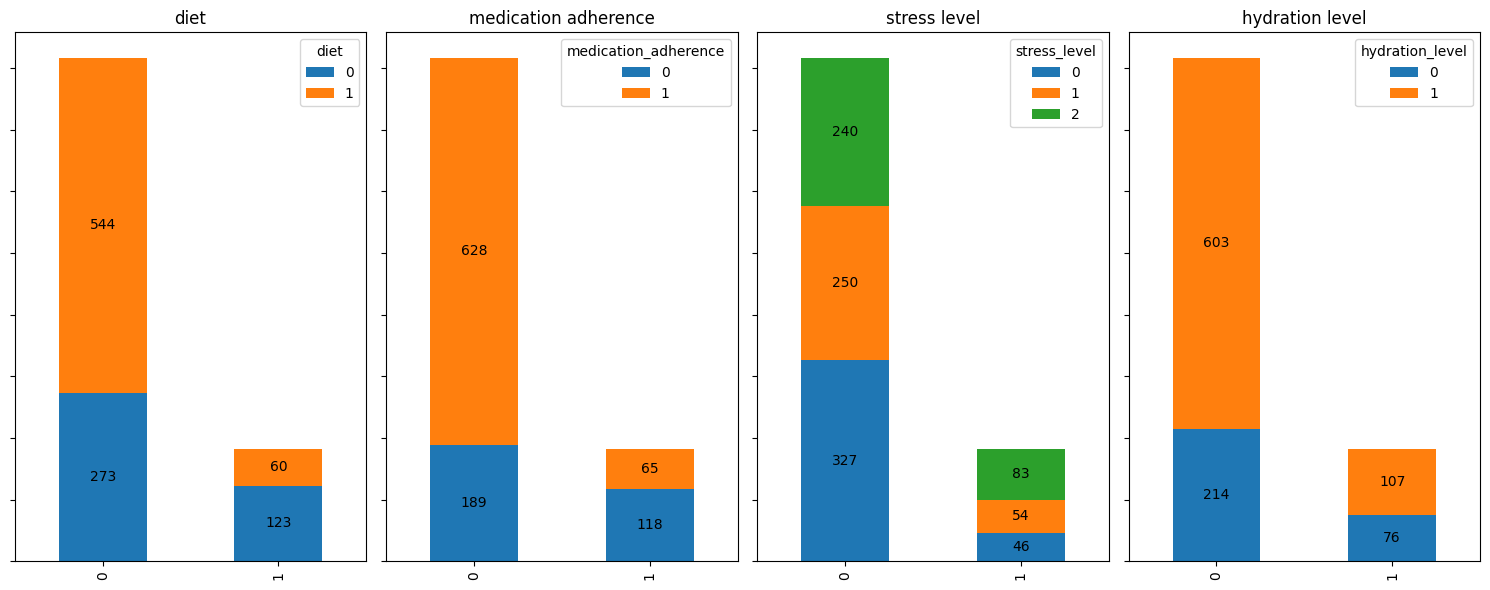

In [3]:
grouped = df.groupby("diabetes")

fig, axes = plt.subplots(ncols=4, figsize=(15, 6))

for i, j in enumerate(cats[:-1]):
    grouped[j].value_counts().unstack().plot(kind="bar", stacked=True, ax=axes[i])
    bar_labels(axes[i], 0, "center")
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

# Physical parameters and sleep duration among patients

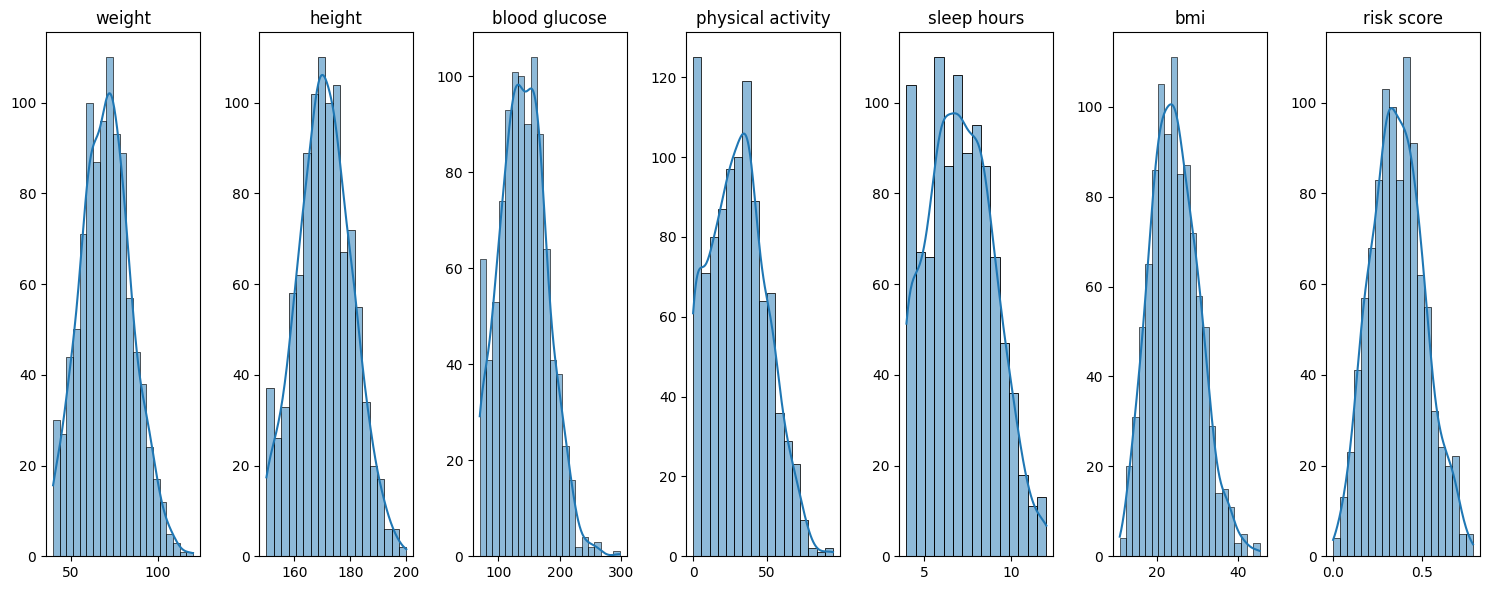

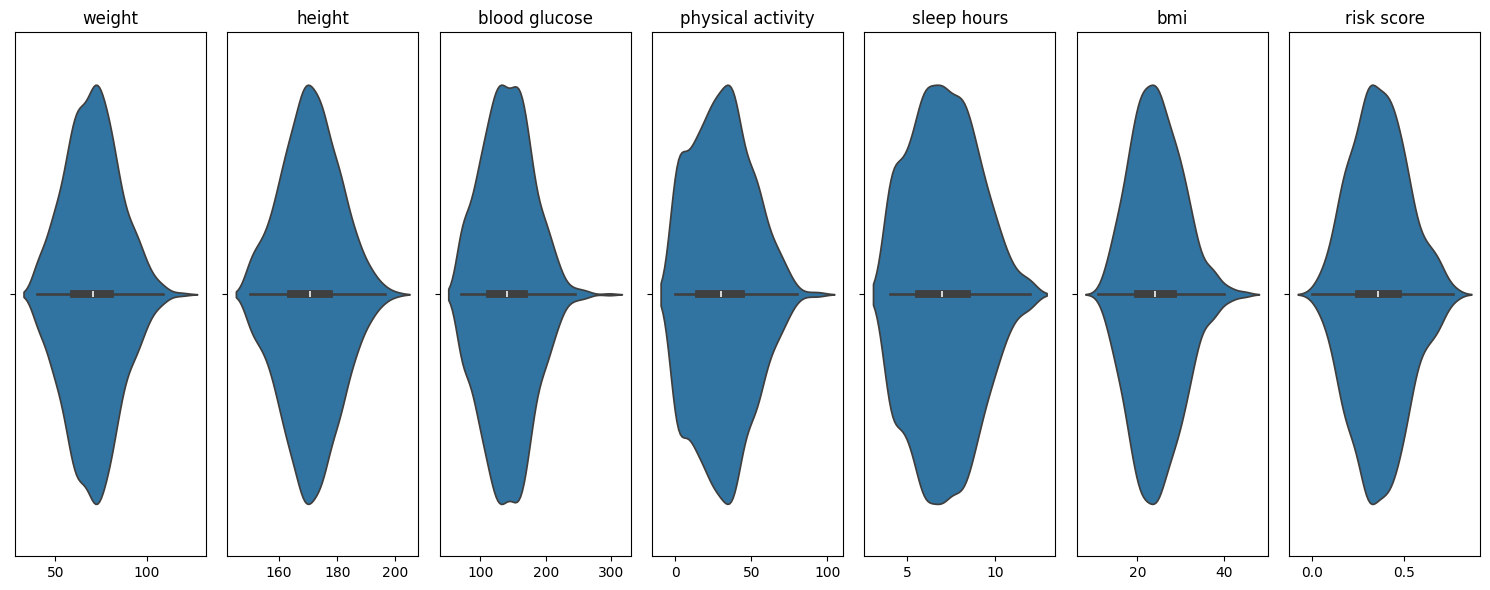

In [4]:
nums = [i for i in df.columns if i not in cats]

fig, axes = plt.subplots(ncols=7, figsize=(15, 6))

for i, j in enumerate(nums):
    sns.histplot(df, x=j, kde=True, ax=axes[i])
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols=7, figsize=(15, 6))

for i, j in enumerate(nums):
    sns.violinplot(df, x=j, ax=axes[i])
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

# Patients with diabetes and their physical state with sleeping habits

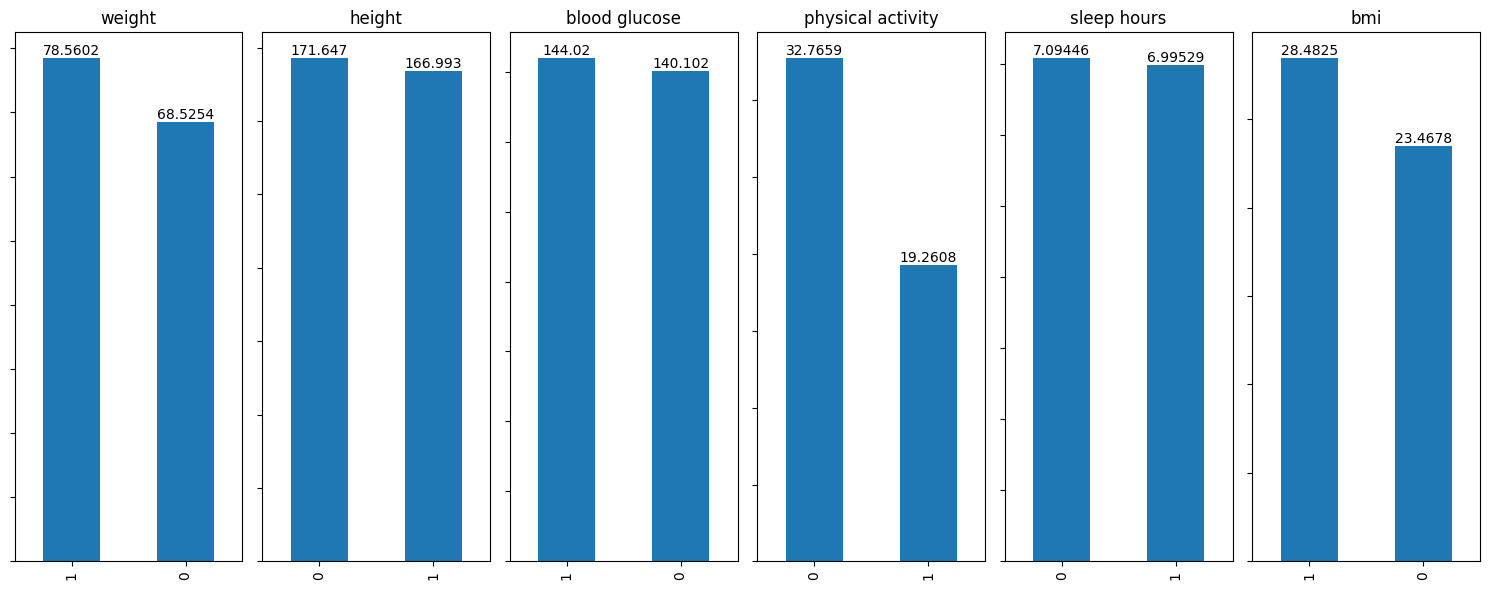

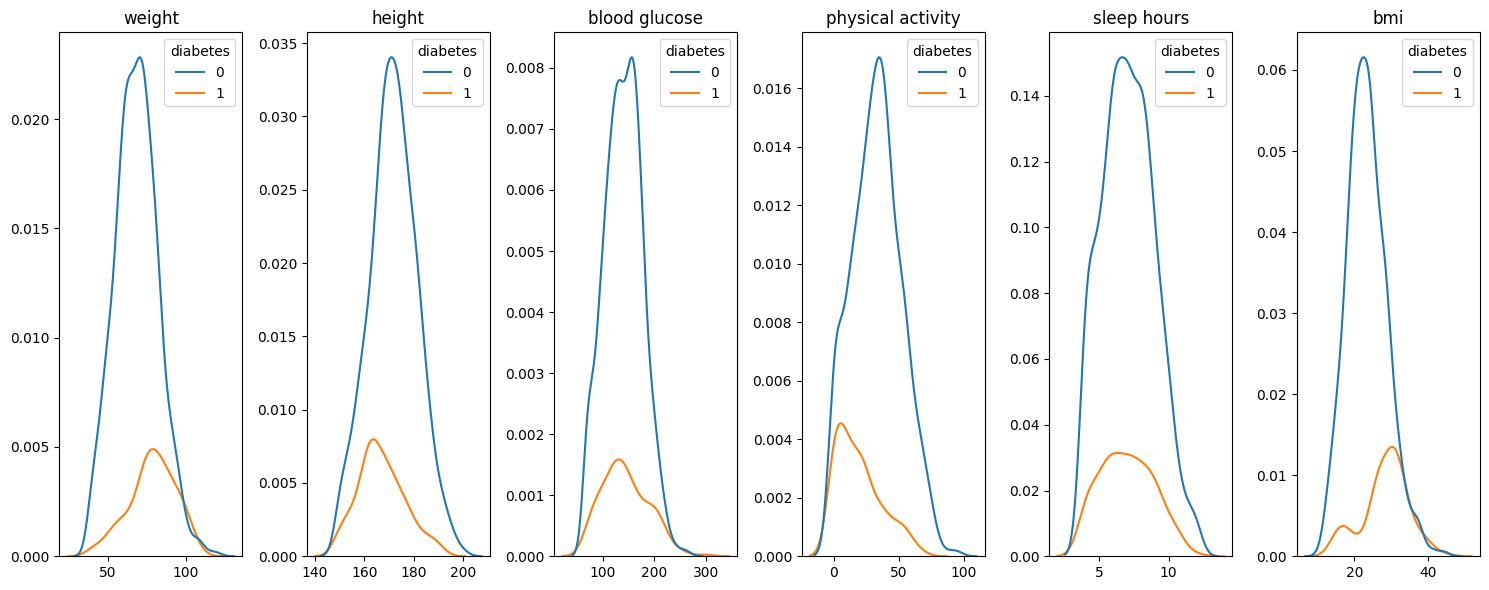

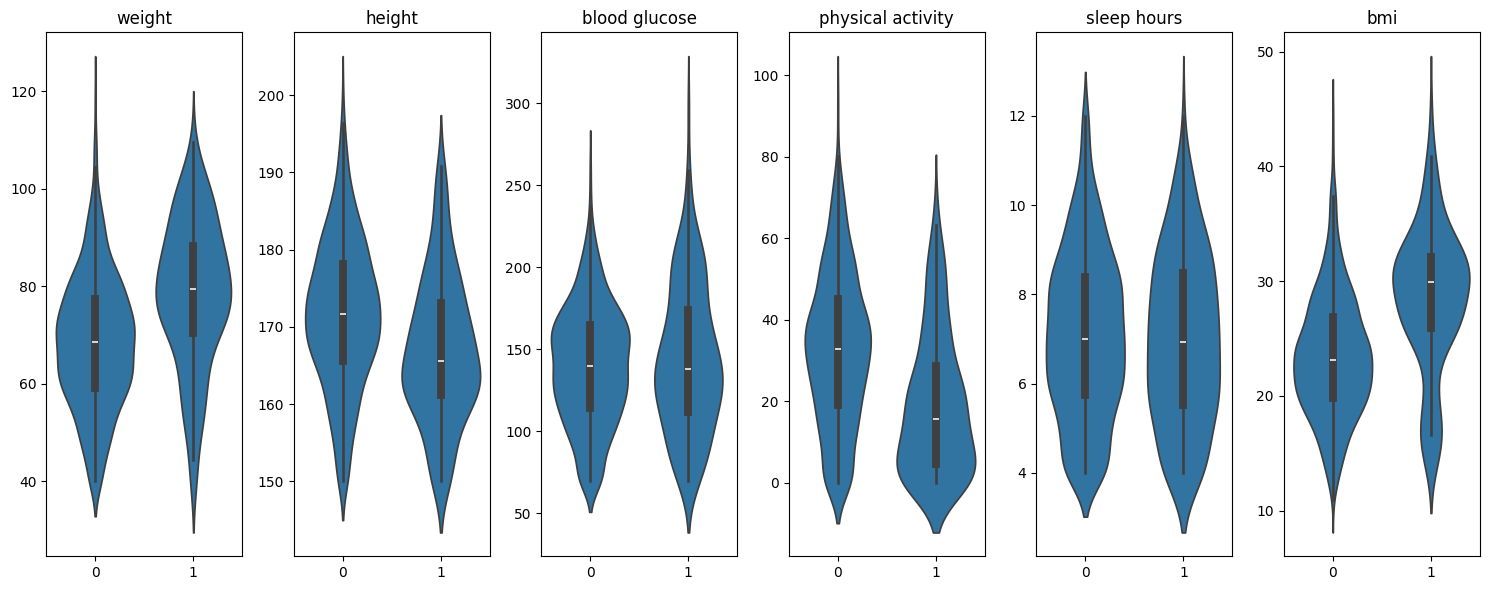

In [5]:
fig, axes = plt.subplots(ncols=6, figsize=(15, 6))

for i, j in enumerate(nums[:-1]):
    grouped[j].mean().sort_values(ascending=False).plot(kind="bar", ax=axes[i])
    bar_labels(axes[i])
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols=6, figsize=(15, 6))

for i, j in enumerate(nums[:-1]):
    sns.kdeplot(df, x=j, hue="diabetes", ax=axes[i])
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols=6, figsize=(15, 6))

for i, j in enumerate(nums[:-1]):
    sns.violinplot(df, x="diabetes", y=j, ax=axes[i])
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

# Average diabetes risk score among patients with different habits

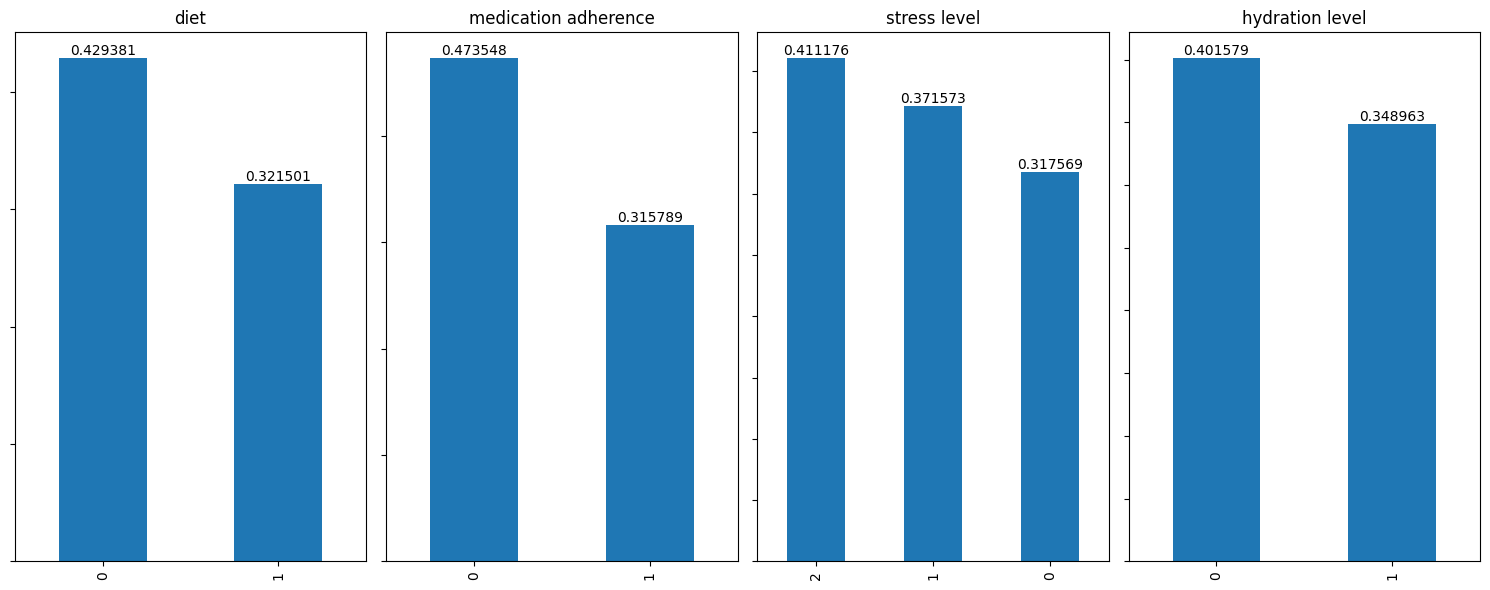

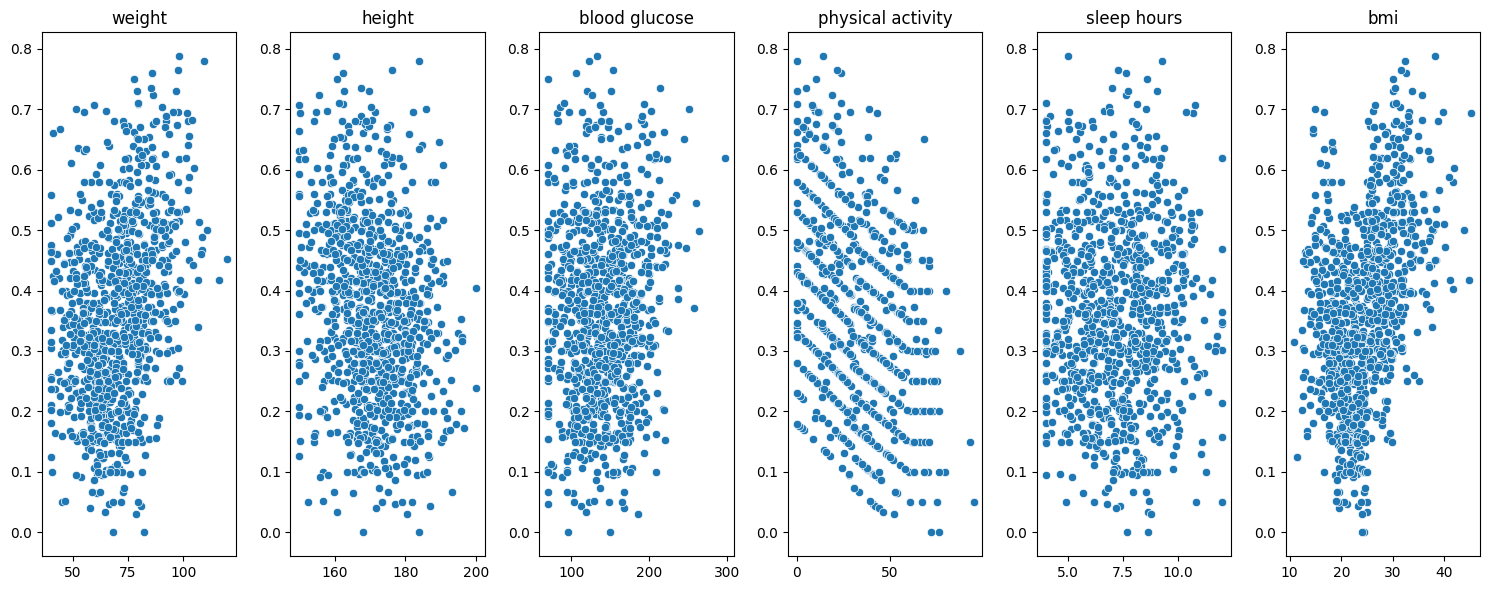

In [6]:
fig, axes = plt.subplots(ncols=4, figsize=(15, 6))

for i, j in enumerate(cats[:-1]):
    df.groupby(j)["risk_score"].mean().sort_values(ascending=False).plot(kind="bar", ax=axes[i])
    bar_labels(axes[i])
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(ncols=6, figsize=(15, 6))

for i, j in enumerate(nums[:-1]):
    sns.scatterplot(df, x=j, y="risk_score", ax=axes[i])
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

# Regression models perforamnces predicting diabetes risk scores

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1440
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] Start training from score 0.366186
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

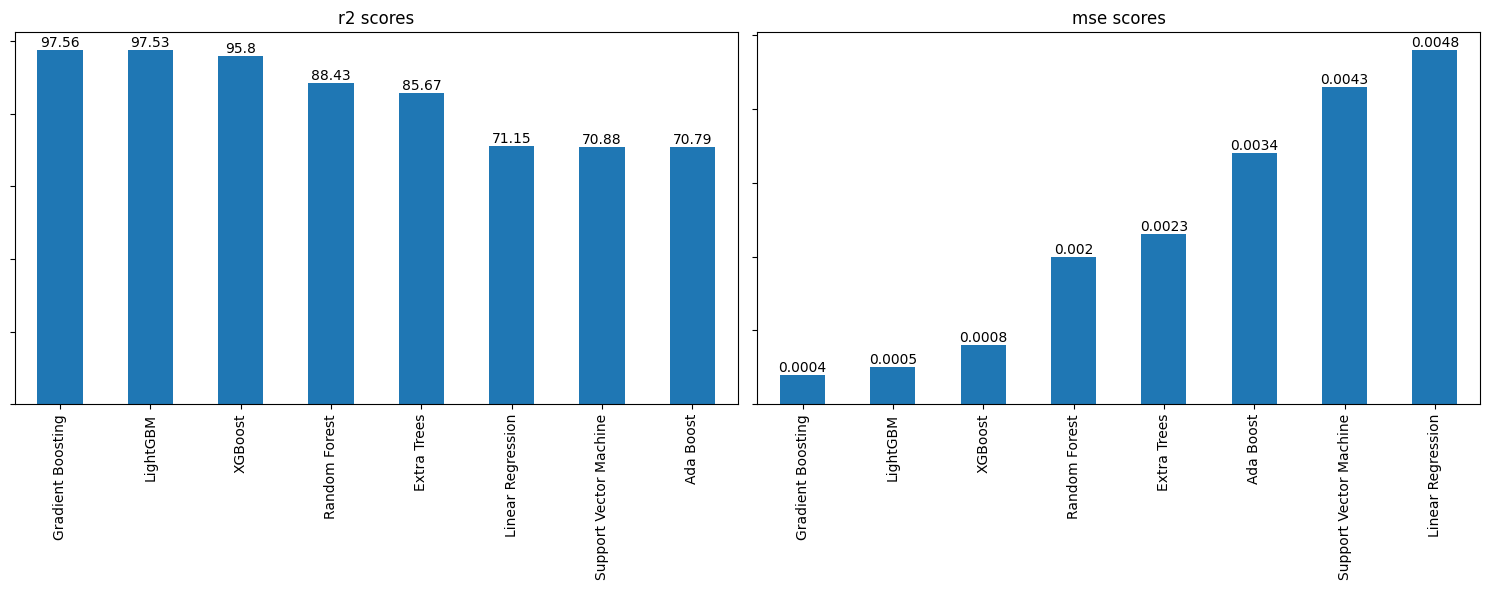

In [7]:
scaler = MinMaxScaler()

x = df.iloc[:, :-2].values
y = df.iloc[:, -2].values

x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

training_regression()

# Classification models performances in detetcing diabetes in patients

[LightGBM] [Info] Number of positive: 653, number of negative: 653
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1586
[LightGBM] [Info] Number of data points in the train set: 1306, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


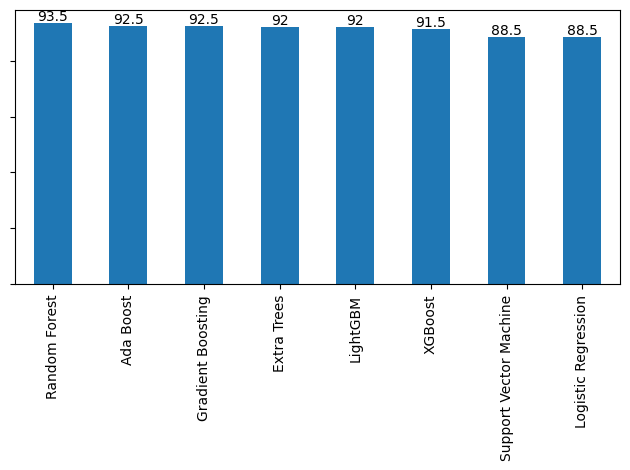

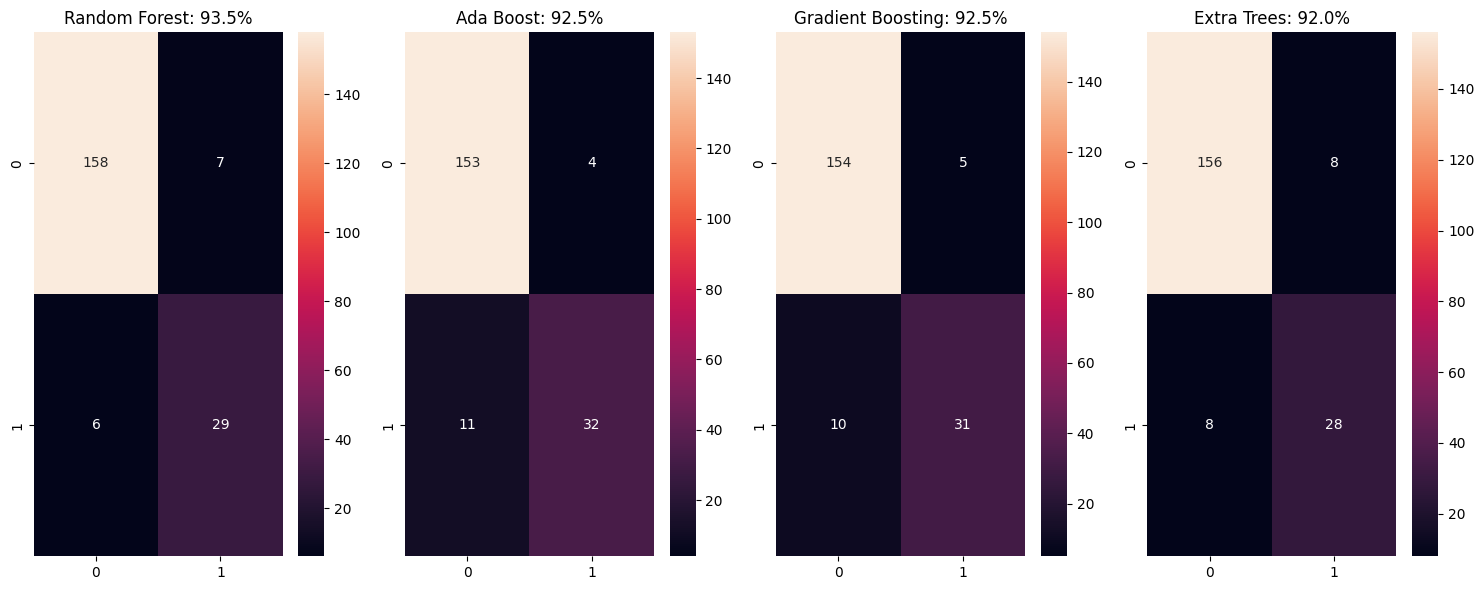

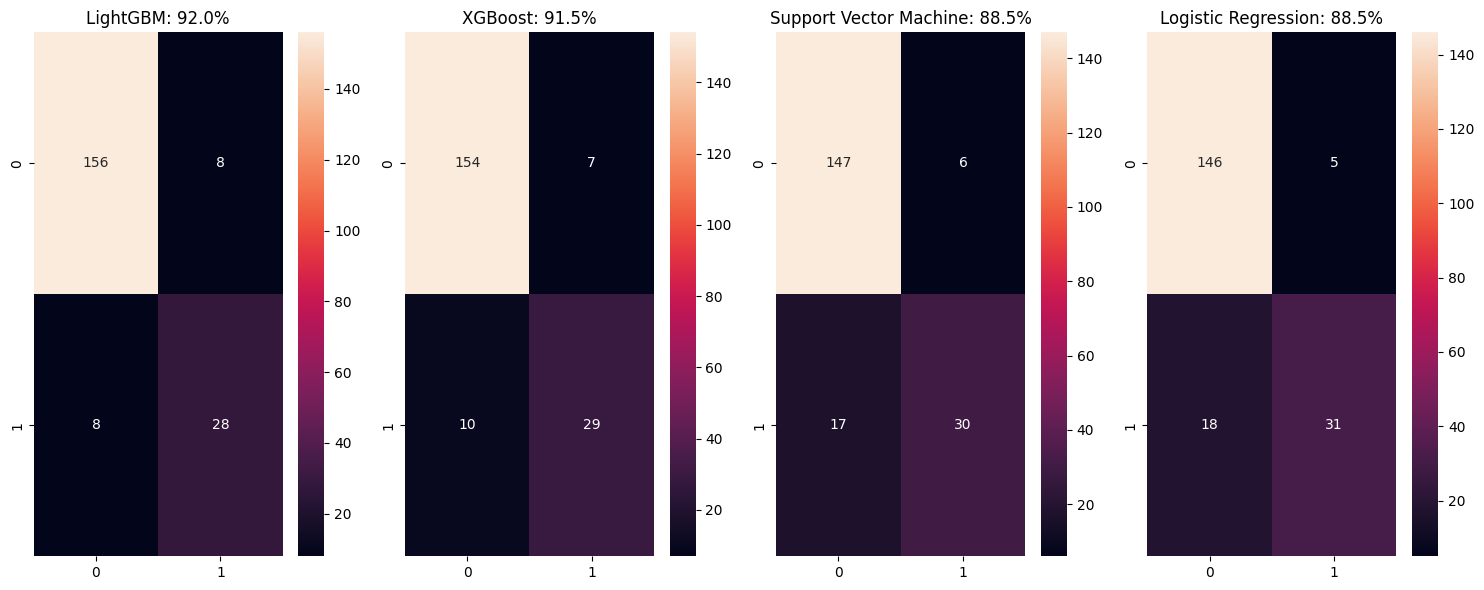

******************************
Random Forest
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       165
           1       0.81      0.83      0.82        35

    accuracy                           0.94       200
   macro avg       0.88      0.89      0.89       200
weighted avg       0.94      0.94      0.94       200




******************************
Ada Boost
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       157
           1       0.89      0.74      0.81        43

    accuracy                           0.93       200
   macro avg       0.91      0.86      0.88       200
weighted avg       0.92      0.93      0.92       200




******************************
Gradient Boosting
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       159
           1       0.86      0.76      0.81        41

    accuracy                           0.

In [8]:
scaler = MinMaxScaler()

x = df.iloc[:, :-2].values
y = df.iloc[:, -1].values

x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
x_train, y_train = SMOTE().fit_resample(x_train, y_train)
training_classification()